In [151]:
#Значения переменных
#A1_Score      Я часто замечаю еле уловимые звуки, которые не замечают другие люди. 
#A2_Score      Обычно я больше концентрируюсь на картине в целом, чем на мелких деталях.
#A3_Score      Мне легко заниматься несколькими делами сразу.
#A4_Score      Если меня отвлекли, я очень быстро могу вернуться к прежнему занятию. 
#A5_Score      Мне легко «читать между строк», когда со мной кто-то разговаривает.   
#A6_Score      Я знаю, как определить, что слушающему меня человеку становится скучно.   
#A7_Score      Когда я читаю повесть, мне сложно понять намерения персонажей.
#A8_Score      Мне нравится собирать информацию о категориях вещей (к примеру, типах машин, видах птиц, типах поездов, видах растений и т. д.).     
#A9_Score      Мне легко понять, что думает или чувствует другой человек, просто взглянув на его лицо.    
#A10_Score     Мне сложно понять намерения других людей.    
#age           Возраст  
#gender        Пол   
#ethnicity     Национальность   
#jundice       Болел ли испытуемый желтухой   
#austim        Есть ли у испытуемого аутизм 
#contry_of_res Страна проживания 
#used_app_before  
#result         Результат теста  
#age_desc       Возрастная категория   
#relation       Состоит ли человек в отношениях





import pandas as pd
import numpy as np
from time import time
from IPython.display import display # Allows use of Display() for Dataframes.

%matplotlib inline 
#Загрузили датасет
data = pd.read_csv('autism_screening.csv')
#Просмотрели переменные(названия столбцов датасета)
display(data.head())
# Проверяем наличие пропущенных данных и выводим их количество
print("Количество пропущенных данных по столбцам перед обработкой:")
print(data.isna().sum())

# Заменяем 'Not Available' на NaN и проверяем еще раз
data = data.replace({'Not Available': np.nan})
print("\nКоличество пропущенных данных по столбцам после замены 'Not Available' на NaN:")
print(data.isna().sum())


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


Количество пропущенных данных по столбцам перед обработкой:
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Количество пропущенных данных по столбцам после замены 'Not Available' на NaN:
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relatio

In [152]:
data.info()

#Удаляем ячейки с пропущенными значениями и снова определяем доли по ASD
data.dropna(inplace=True)
 
# Функция для вывода статистики по ASD
def print_asd_statistics(df):
    n_records = len(df)
    n_asd_yes = len(df[df['Class/ASD'] == 'YES'])
    n_asd_no = len(df[df['Class/ASD'] == 'NO'])
    yes_percentage = (n_asd_yes / n_records) * 100

    print(f'Всего опрошенных: {n_records}')
    print(f'Число опрошенных с подтвержденным диагнозом расстройства аутистического спектра: {n_asd_yes}')
    print(f'Число здоровых опрошенных: {n_asd_no}')
    print(f"Доля людей в датасете с расстройством аутистического спектра: {yes_percentage:.2f}%")

# Выводим базовую информацию о данных после очистки
data.info()
# Выводим статистику после удаления пропущенных значений
print("\nСтатистика после удаления пропущенных значений:")
print_asd_statistics(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

<Figure size 1400x1200 with 0 Axes>

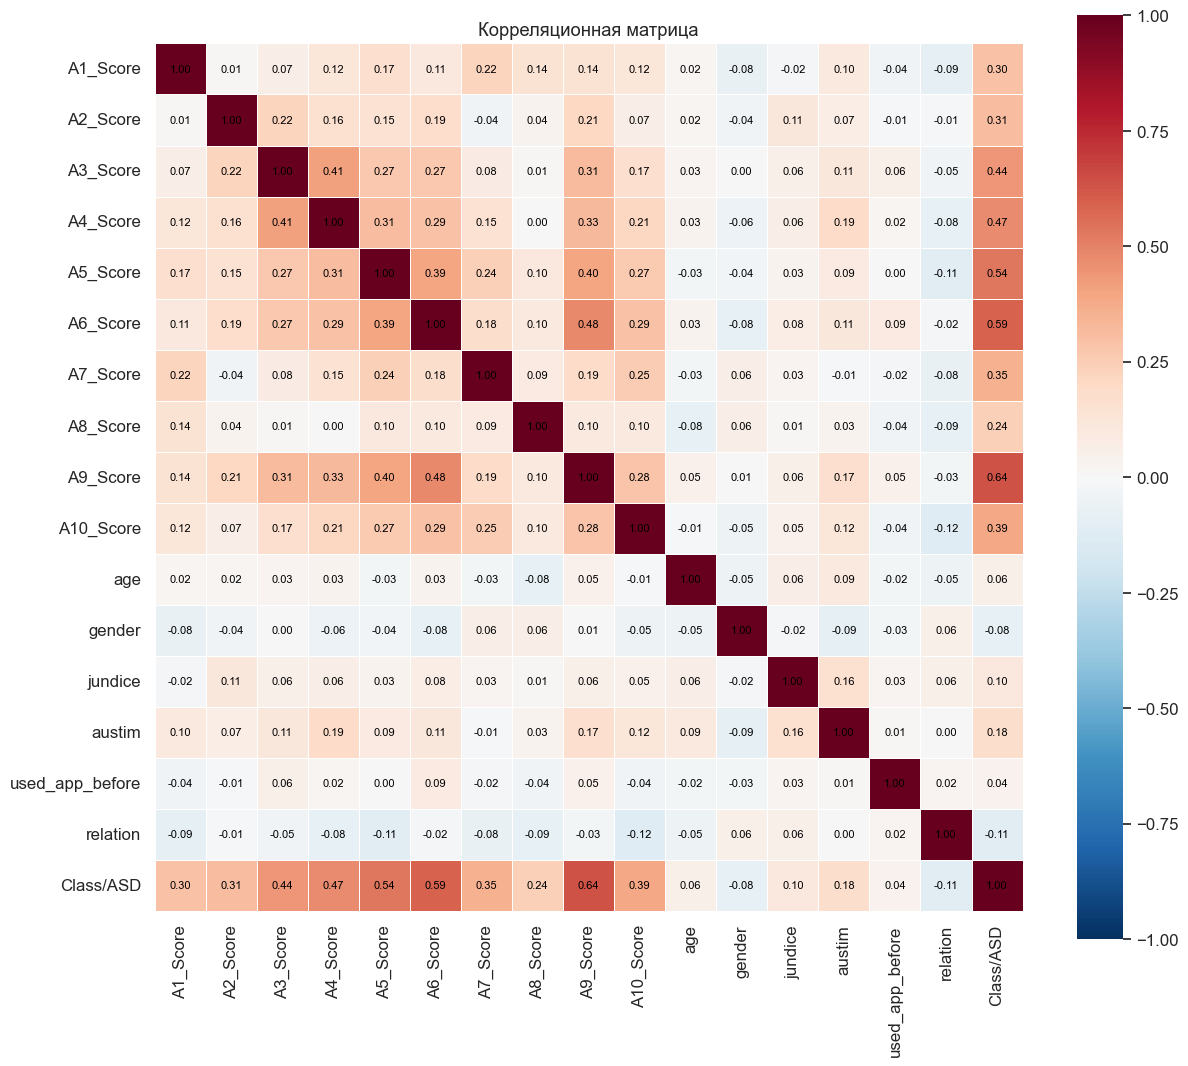

In [153]:
# Удаление столбцов, которые не участвуют в анализе
if 'ethnicity' in data.columns and 'contry_of_res' in data.columns and 'age_desc' in data.columns and 'result' in data.columns:
    data = data.drop(columns=['ethnicity', 'contry_of_res', 'age_desc', 'result'])

# Преобразование категориальных переменных в числовые
mappings = {
    'gender': {'f': 0, 'm': 1},
    'jundice': {'no': 0, 'yes': 1},
    'austim': {'no': 0, 'yes': 1},
    'used_app_before': {'no': 0, 'yes': 1},
    'Class/ASD': {'NO': 0, 'YES': 1},
    'relation': {'Self': 0, 'Parent': 1, 'Health care professional': 2, '?': 3, 'Relative': 4, 'Others': 5}
}

for column, mapping in mappings.items():
    if column in data.columns:
        data[column] = data[column].map(mapping)
        
# Удаление строк с пропущенными значениями
data.dropna(inplace=True)

# Конвертация всех возможных текстовых полей в числа
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Удаление строк с NaN значениями после конвертации
data.dropna(inplace=True)

# Сброс индексов, чтобы гарантировать корректность индексов после всех операций
data.reset_index(drop=True, inplace=True)

# Построение корреляционной матрицы
corr_matrix = data.corr()

# Устанавливаем размер фигуры и шрифта
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.1)

# Продвинутая визуализация с добавлением текста в ячейки
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1, square=True, linewidths=0.5)

# Добавление аннотаций вручную
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j+0.5, i+0.5, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", size=8)

plt.title('Корреляционная матрица')
plt.show()

In [154]:
#Разделим датасет на два: переменную Class/ASD и остальные переменные
data_main = data['Class/ASD']
features_raw = data[['age', 'gender', 'jundice', 'austim',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]
# Убедимся, что переменная 'result' удалена и не используется в модели
if 'result' in features_raw.columns:
    features_raw = features_raw.drop(['result'], axis=1)

In [155]:
from sklearn.preprocessing import MinMaxScaler

# Стандартизируем набор данных относительно возраста
scaler = MinMaxScaler()
age_columns = ['age']  

features_mM_tr = features_raw.copy()
features_mM_tr[age_columns] = scaler.fit_transform(features_raw[age_columns])

display(features_mM_tr.head(3))

,age,gender,jundice,austim,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,0,0,0,0,1,1,1,1,0,0,1,1,0,0
1,0.019126,1,0,1,0,1,1,0,1,0,0,0,1,0,1
2,0.027322,1,1,1,1,1,1,0,1,1,0,1,1,1,1


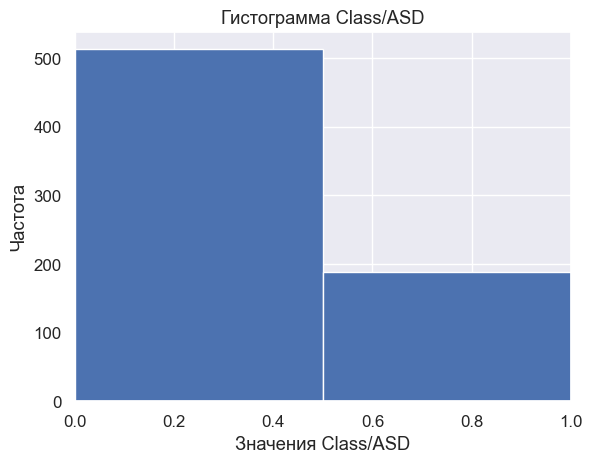

In [156]:
featuresfin = pd.get_dummies(features_mM_tr)
featuresfin.head(5)

#Создадим гистограмму, показывающую частоту значений по переменной  Class/ASD для наглядности
plt.hist(data_main, bins=2)
plt.xlim(0,1)
plt.title('Гистограмма Class/ASD')
plt.xlabel('Значения Class/ASD')
plt.ylabel('Частота')
plt.show()


In [157]:
from sklearn.model_selection import train_test_split

# Разделим датасет на обучающую и тестовую части для машинного обучения
X_train, X_test, y_train, y_test = train_test_split(featuresfin, data_main, test_size=0.2, random_state=1)

print(f"Обучающий набор содержит {X_train.shape[0]} строк.")
print(f"Тестовый набор содержит {X_test.shape[0]} строк.")

Обучающий набор содержит 561 строк.
Тестовый набор содержит 141 строк.


In [158]:
from sklearn.tree import DecisionTreeClassifier
# Используем метод дерева решений для подбора модели.
dectr_model = DecisionTreeClassifier()
dectr_model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [159]:
# Сравним степень соответствия в наборах
y_pred = dectr_model.predict(X_test)
print('True  :', y_test.values[0:25])
print('Pred :', y_pred[0:25])

True  : [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
Pred : [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0]


In [160]:
from sklearn import metrics

#Проверим параметры модели 
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]

print('\nMetrics:')
print(f'Accuracy(Точность): {(TP + TN) / float(TP + TN + FP + FN):.2f}')
print(f'Error Rate(Доля ошибок): {(FP + FN) / float(TP + TN + FP + FN):.2f}')
print(f'Precision: {metrics.precision_score(y_test, y_pred):.2f}')
print(f'Score: {dectr_model.score(X_test, y_test):.2f}')

[[97  4]
 [ 7 33]]

Metrics:
Accuracy(Точность): 0.92
Error Rate(Доля ошибок): 0.08
Precision: 0.89
Score: 0.92


In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

# Попробуем использовать метод случайного леса
rndm_model = RandomForestClassifier(n_estimators=5, random_state=1)
cv_score = cross_val_score(rndm_model, featuresfin, data_main, cv=10)
print(f'Средняя точность на кросс-валидации: {cv_score.mean():.2f}')

# Находим F-beta для оценки качества модели
rndm_model.fit(X_train, y_train)
y_pred_rf = rndm_model.predict(X_test)
print(f'F-beta score: {fbeta_score(y_test, y_pred_rf, beta=0.5):.2f}')
# Модель обучена хорошо

Средняя точность на кросс-валидации: 0.93
F-beta score: 0.90


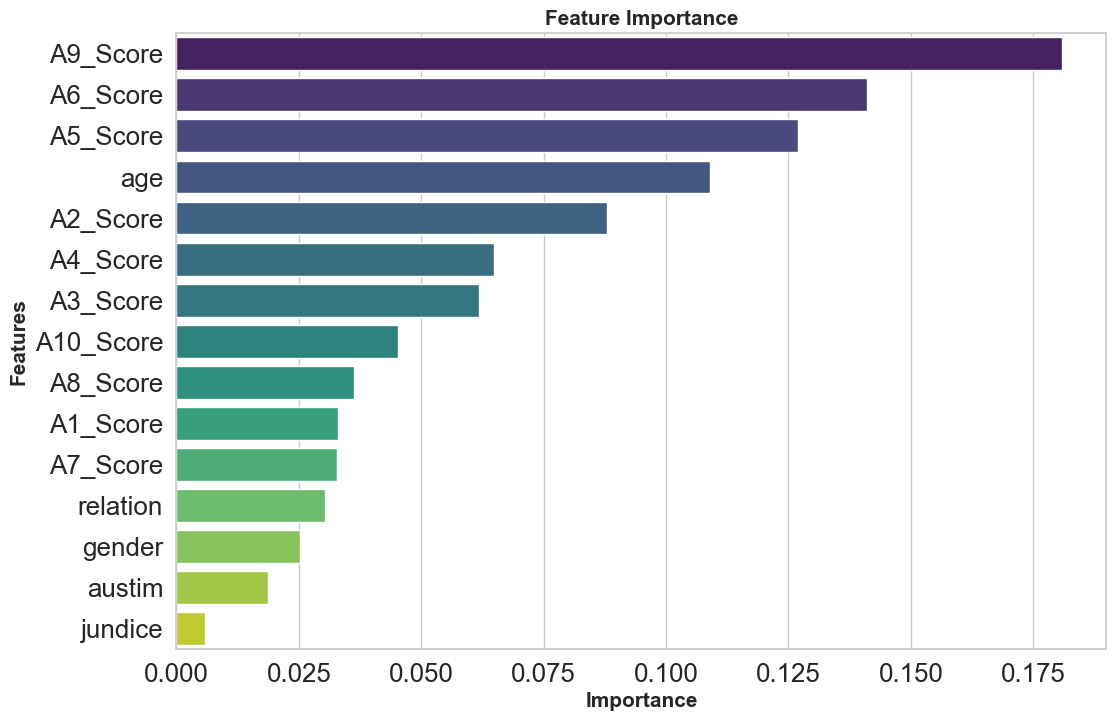

,Features,Gini-Importance
0,A9_Score,0.180889
1,A6_Score,0.141027
2,A5_Score,0.126989
3,age,0.108947
4,A2_Score,0.088017


In [162]:
# Убедимся, что используем одинаковый порядок признаков
# Определение признаков, использованных в модели
model_features = featuresfin.columns

# Сортировка датафрейма data по порядку признаков в model_features
data = data[model_features]

# Узнаем, какие признаки являются самыми важными для RF-модели в предсказании
feats = {feature: importance for feature, importance in zip(model_features, rndm_model.feature_importances_)}
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances.sort_values(by='Gini-Importance', ascending=False, inplace=True)
importances.reset_index(inplace=True)
importances.rename(columns={'index': 'Features'}, inplace=True)

# Визуализация важности признаков
sns.set(style="whitegrid", font_scale=1.7)
plt.figure(figsize=(12, 8))
sns.barplot(x='Gini-Importance', y='Features', data=importances, palette='viridis')
plt.xlabel('Importance', fontsize=15, weight='bold')
plt.ylabel('Features', fontsize=15, weight='bold')
plt.title('Feature Importance', fontsize=15, weight='bold')
plt.show()

# Выводим топ наиболее важных признаков для быстрого обзора
display(importances.head())

In [163]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score

# Проверим возможность использования Наивного байесовского классификатора.
nb_model = MultinomialNB()
cv_score = cross_val_score(nb_model, featuresfin, data_main, cv=10)
print(f'Средняя точность на кросс-валидации: {cv_score.mean():.2f}')

nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print('F-beta: ', fbeta_score(y_test, y_pred, average='binary', beta=0.5))
#Данная модель обучена хуже, чем предыдущие

Средняя точность на кросс-валидации: 0.87
F-beta:  0.7777777777777778


In [164]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
#Проведем настройку параметров модели
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)

clf = SVC(random_state = 1)
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}
scorer = make_scorer(f_beta_score)

grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train.values, y_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train.values, y_train)).predict(X_test.values)
best_predictions = best_clf.predict(X_test.values)

print ("Не оптимизированная модель \n------")
print ("Оценка точности по данным тестирования: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score по данным тестирования: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nОптимизированная модель\n------")
print ("Итоговая оценка точности по данным тестирования: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Итоговая F-score по данным тестирования: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Не оптимизированная модель 
------
Оценка точности по данным тестирования: 0.9716
F-score по данным тестирования: 0.9635

Оптимизированная модель
------
Итоговая оценка точности по данным тестирования: 1.0000
Итоговая F-score по данным тестирования: 1.0000
